In [1]:
pip install nnunetv2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 206.3/206.3 kB 4.4 MB/s eta 0:00:0000:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.0/77.0 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.9 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.7 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 29.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 12.6 MB/s eta 0

In [2]:
!mkdir nnUNet_raw
!mkdir nnUNet_raw/Dataset099_NoduleSegmantation
!mkdir nnUNet_raw/Dataset099_NoduleSegmantation/imagesTr
!mkdir nnUNet_raw/Dataset099_NoduleSegmantation/labelsTr

In [3]:
import os
images=os.listdir('/kaggle/input/lidc-idri-preprocessed/CT images and masks/train/images')
print(len(images))

14343


In [4]:
import numpy as np
from tqdm import tqdm
import shutil
from PIL import Image
import random

images=os.listdir('/kaggle/input/lidc-idri-preprocessed/CT images and masks/train/images')
curr=0
for i  in tqdm(range(len(images))) :

    old_path = '/kaggle/input/lidc-idri-preprocessed/CT images and masks/train/masks/'+images[i]
    img = Image.open(old_path)
    img = np.array(img, dtype=np.uint8)
    if np.max(img)==2 :
        for j in range(3) :
            if j==1 :
                img1=np.fliplr(img)
            elif j==2 :
                img1=np.flipud(img)
            else :
                img1=img
            CASE_IDENTIFIER=str(curr).zfill(5)
            curr+=1
            new_path='/kaggle/working/nnUNet_raw/Dataset099_NoduleSegmantation/labelsTr/'+CASE_IDENTIFIER+'.png'
            img1[img1==1]=0
            img1[img1==2]=1
            img1 = Image.fromarray(img1)
            img1.save(new_path)
            
            old_path = '/kaggle/input/lidc-idri-preprocessed/CT images and masks/train/images/'+images[i]
            image = Image.open(old_path)
            image = np.array(image, dtype=np.uint8)
            if j==1 :
                img1=np.fliplr(image)
            elif j==2 :
                img1=np.flipud(image)
            else :
                img1=image
            new_path='/kaggle/working/nnUNet_raw/Dataset099_NoduleSegmantation/imagesTr/'+CASE_IDENTIFIER+'_0000.png'
            img1 = Image.fromarray(img1)
            img1.save(new_path)
    else :
        if np.max(img)==1 :
            CASE_IDENTIFIER=str(curr).zfill(5)
            curr+=1
            img=np.zeros((512, 512), dtype=np.uint8)
            new_path='/kaggle/working/nnUNet_raw/Dataset099_NoduleSegmantation/labelsTr/'+CASE_IDENTIFIER+'.png'
            img1 = Image.fromarray(img)
            img1.save(new_path)
            old_path = '/kaggle/input/lidc-idri-preprocessed/CT images and masks/train/images/'+images[i]
            new_path='/kaggle/working/nnUNet_raw/Dataset099_NoduleSegmantation/imagesTr/'+CASE_IDENTIFIER+'_0000.png'
            shutil.copy(old_path, new_path)
        elif random.random()<0.2 :
            CASE_IDENTIFIER=str(curr).zfill(5)
            curr+=1
            new_path='/kaggle/working/nnUNet_raw/Dataset099_NoduleSegmantation/labelsTr/'+CASE_IDENTIFIER+'.png'
            shutil.copy(old_path, new_path)
            old_path = '/kaggle/input/lidc-idri-preprocessed/CT images and masks/train/images/'+images[i]
            new_path='/kaggle/working/nnUNet_raw/Dataset099_NoduleSegmantation/imagesTr/'+CASE_IDENTIFIER+'_0000.png'
            shutil.copy(old_path, new_path)

100%|██████████| 14343/14343 [07:29<00:00, 31.89it/s]


In [5]:
print(curr)

7962


In [6]:
images=os.listdir('/kaggle/input/lidc-idri-preprocessed/CT images and masks/val/images')
for i  in tqdm(range(len(images))) :

    old_path = '/kaggle/input/lidc-idri-preprocessed/CT images and masks/val/masks/'+images[i]
    img = Image.open(old_path)
    img = np.array(img, dtype=np.uint8)
    if np.max(img)==3 :
        continue
    if np.max(img)==2 :
        for j in range(3) :
            if j==1 :
                img1=np.fliplr(img)
            elif j==2 :
                img1=np.flipud(img)
            else :
                img1=img
            CASE_IDENTIFIER=str(curr).zfill(5)
            curr+=1
            new_path='/kaggle/working/nnUNet_raw/Dataset099_NoduleSegmantation/labelsTr/'+CASE_IDENTIFIER+'.png'
            img1[img1==1]=0
            img1[img1==2]=1
            img1 = Image.fromarray(img1)
            img1.save(new_path)
            
            old_path = '/kaggle/input/lidc-idri-preprocessed/CT images and masks/val/images/'+images[i]
            image = Image.open(old_path)
            image = np.array(image, dtype=np.uint8)
            if j==1 :
                img1=np.fliplr(image)
            elif j==2 :
                img1=np.flipud(image)
            else :
                img1=image
            new_path='/kaggle/working/nnUNet_raw/Dataset099_NoduleSegmantation/imagesTr/'+CASE_IDENTIFIER+'_0000.png'
            img1 = Image.fromarray(img1)
            img1.save(new_path)
    else :
        if np.max(img)==1 :
            CASE_IDENTIFIER=str(curr).zfill(5)
            curr+=1
            img=np.zeros((512, 512), dtype=np.uint8)
            new_path='/kaggle/working/nnUNet_raw/Dataset099_NoduleSegmantation/labelsTr/'+CASE_IDENTIFIER+'.png'
            img1 = Image.fromarray(img)
            img1.save(new_path)
            old_path = '/kaggle/input/lidc-idri-preprocessed/CT images and masks/val/images/'+images[i]
            new_path='/kaggle/working/nnUNet_raw/Dataset099_NoduleSegmantation/imagesTr/'+CASE_IDENTIFIER+'_0000.png'
            shutil.copy(old_path, new_path)
        elif random.random()<0.2 :
            CASE_IDENTIFIER=str(curr).zfill(5)
            curr+=1
            new_path='/kaggle/working/nnUNet_raw/Dataset099_NoduleSegmantation/labelsTr/'+CASE_IDENTIFIER+'.png'
            shutil.copy(old_path, new_path)
            old_path = '/kaggle/input/lidc-idri-preprocessed/CT images and masks/val/images/'+images[i]
            new_path='/kaggle/working/nnUNet_raw/Dataset099_NoduleSegmantation/imagesTr/'+CASE_IDENTIFIER+'_0000.png'
            shutil.copy(old_path, new_path)

100%|██████████| 3391/3391 [01:36<00:00, 35.20it/s]


In [7]:
print(curr)

9713


In [11]:
import json
data={
    "channel_names": {"0": "2D_image"},
    "labels": {"background": 0, "malignant_nodule": 1},
    "numTraining": curr,
    "file_ending": ".png"
}
with open("/kaggle/working/nnUNet_raw/Dataset099_NoduleSegmantation/dataset.json", "w") as f:
    json.dump(data, f) 

In [9]:
os.environ["nnUNet_raw"] = "/kaggle/working/nnUNet_raw"
os.environ["nnUNet_preprocessed"] = "/kaggle/working/nnUNet_preprocessed"
os.environ["nnUNet_results"] = "/kaggle/working/nnUNet_trained_models"

In [12]:
!nnUNetv2_plan_and_preprocess -d 99 --verify_dataset_integrity

Fingerprint extraction...
Dataset099_NoduleSegmantation
Using <class 'nnunetv2.imageio.natural_image_reader_writer.NaturalImage2DIO'> as reader/writer

####################
verify_dataset_integrity Done. 
If you didn't see any error messages then your dataset is most likely OK!
####################

Using <class 'nnunetv2.imageio.natural_image_reader_writer.NaturalImage2DIO'> as reader/writer
100%|██████████████████████████████████████| 9713/9713 [01:30<00:00, 107.82it/s]
Experiment planning...

############################
INFO: You are using the old nnU-Net default planner. We have updated our recommendations. Please consider using those instead! Read more here: https://github.com/MIC-DKFZ/nnUNet/blob/master/documentation/resenc_presets.md
############################

2D U-Net configuration:
{'data_identifier': 'nnUNetPlans_2d', 'preprocessor_name': 'DefaultPreprocessor', 'batch_size': 12, 'patch_size': (512, 512), 'median_image_size_in_voxels': array([512., 512.]), 'spacing': array

In [14]:
!nnUNetv2_train 99 2d 4 


############################
INFO: You are using the old nnU-Net default plans. We have updated our recommendations. Please consider using those instead! Read more here: https://github.com/MIC-DKFZ/nnUNet/blob/master/documentation/resenc_presets.md
############################

Using device: cuda:0

#######################################################################
Please cite the following paper when using nnU-Net:
Isensee, F., Jaeger, P. F., Kohl, S. A., Petersen, J., & Maier-Hein, K. H. (2021). nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation. Nature methods, 18(2), 203-211.
#######################################################################

2025-05-20 16:52:19.718273: Using torch.compile...
2025-05-20 16:52:21.382051: do_dummy_2d_data_aug: False
2025-05-20 16:52:21.405617: Creating new 5-fold cross-validation split...
2025-05-20 16:52:21.462395: Desired fold for training: 4
2025-05-20 16:52:21.462563: This split has 7771 training a

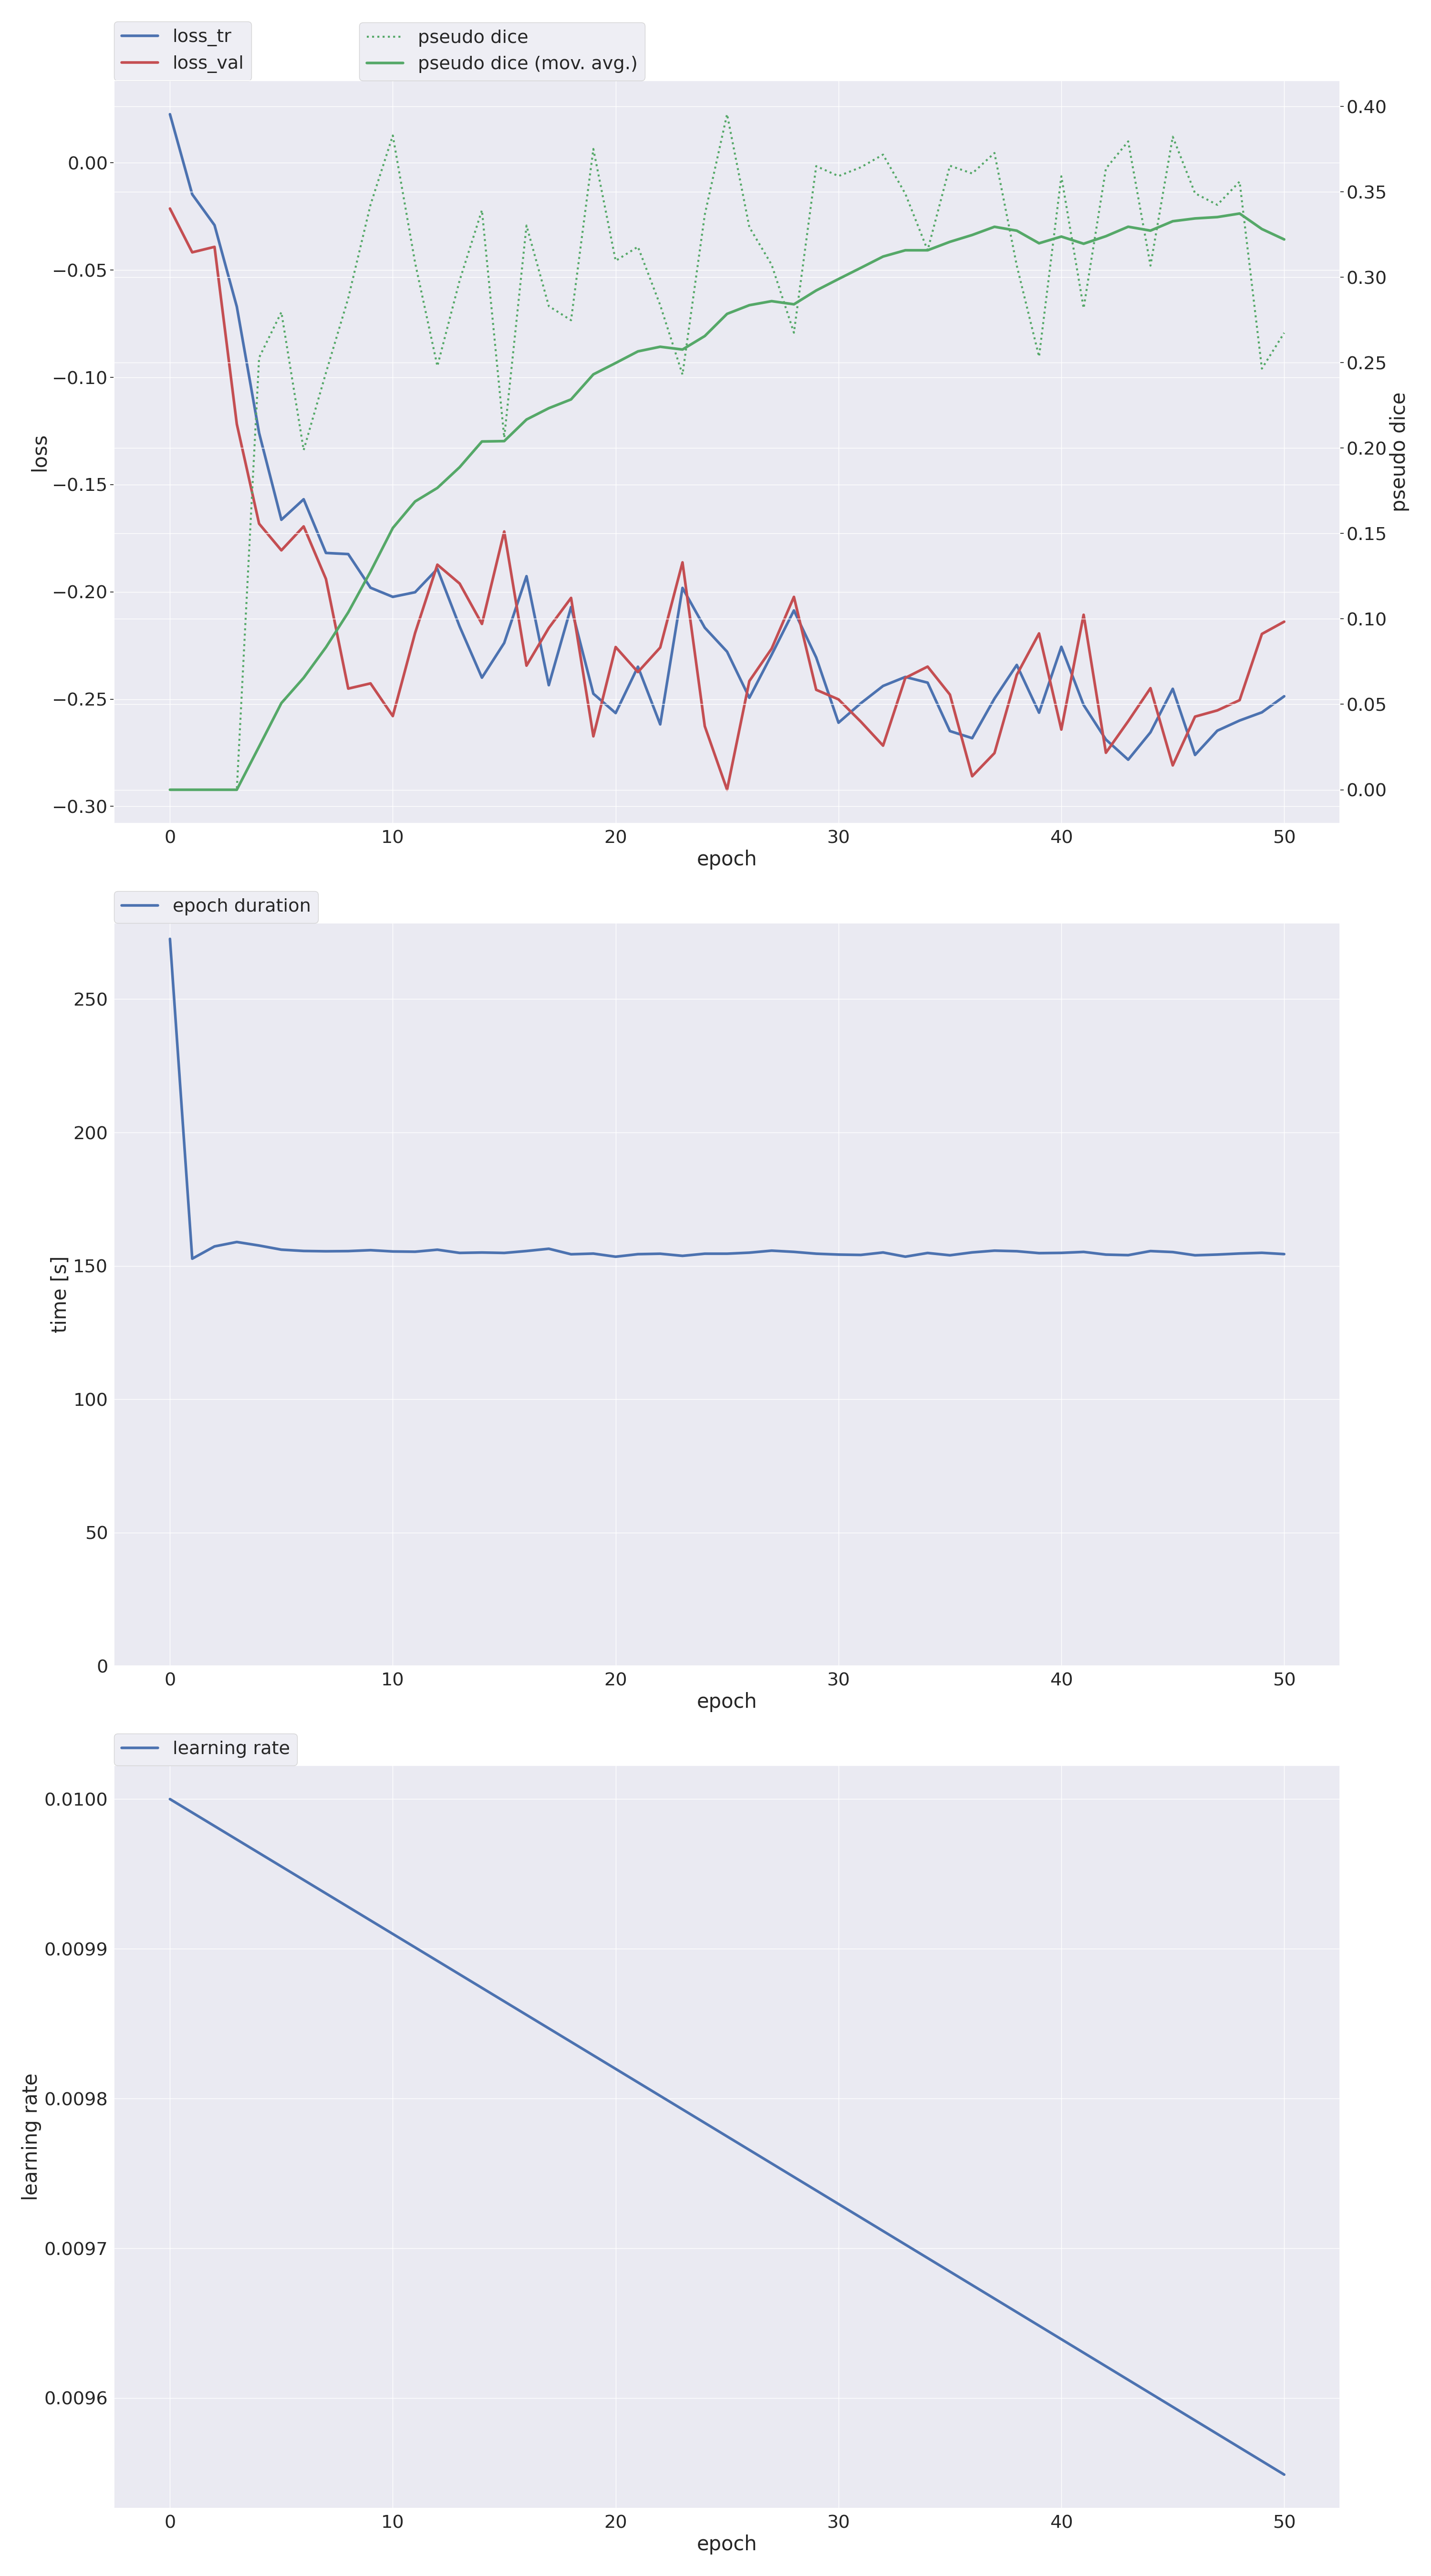

In [15]:
from IPython.display import Image, display
display(Image(filename='/kaggle/working/nnUNet_trained_models/Dataset099_NoduleSegmantation/nnUNetTrainer__nnUNetPlans__2d/fold_4/progress.png'))

In [29]:

!mkdir nnUNet_raw/Dataset099_NoduleSegmantation/imagesTs
!mkdir nnUNet_raw/Dataset099_NoduleSegmantation/gt_bboxes
!mkdir nnUNet_raw/Dataset099_NoduleSegmantation/pred_masks
!mkdir nnUNet_raw/Dataset099_NoduleSegmantation/pred_bboxes

In [30]:
import numpy as np
from tqdm import tqdm
import shutil
from PIL import Image
import cv2
import os
import random


def annotations(mask) :
    ans=[]
    num_labels, labels = cv2.connectedComponents(mask.astype(np.uint8))
    #print(num_labels, labels)
    for i in range(1, num_labels) :
        ys, xs = np.where(labels == i)
        min_x, max_x = xs.min(), xs.max()
        min_y, max_y = ys.min(), ys.max()
        class_id=mask[ys[0], xs[0]]
        #print(class_id, xs[0],ys[0])
        x_center=(min_x+max_x)/2/512
        y_center=(min_y+max_y)/2/512
        width=(max_x-min_x+2)/512
        height=(max_y-min_y+2)/512
        ans.append([class_id, x_center, y_center, width, height])
    return ans


images=os.listdir('/kaggle/input/lidc-idri-preprocessed/CT images and masks/test/images')
for i  in tqdm(range(len(images))) :
    CASE_IDENTIFIER=str(i).zfill(5)

    old_path = '/kaggle/input/lidc-idri-preprocessed/CT images and masks/test/masks/'+images[i]
    img = Image.open(old_path)
    img = np.array(img, dtype=np.uint8)
    if np.max(img)<3 :
        anns=annotations(img)
        new_path='nnUNet_raw/Dataset099_NoduleSegmantation/gt_bboxes/'+CASE_IDENTIFIER+'.txt'
        with open(new_path, "w", encoding="utf-8") as f:
            for ann in anns:
                if ann[0]==2 :
                    f.write(f'{1} {ann[1]} {ann[2]} {ann[3]} {ann[4]}\n')

        
        old_path = '/kaggle/input/lidc-idri-preprocessed/CT images and masks/test/images/'+images[i]
        new_path='nnUNet_raw/Dataset099_NoduleSegmantation/imagesTs/'+CASE_IDENTIFIER+'_0000.png'
        shutil.copy(old_path, new_path)

100%|██████████| 3330/3330 [00:18<00:00, 184.02it/s]


In [31]:
len(os.listdir('nnUNet_raw/Dataset099_NoduleSegmantation/imagesTs/'))

3141

In [34]:
mv /kaggle/working/nnUNet_trained_models/Dataset099_NoduleSegmantation/nnUNetTrainer__nnUNetPlans__2d/fold_4/checkpoint_best.pth /kaggle/working/nnUNet_trained_models/Dataset099_NoduleSegmantation/nnUNetTrainer__nnUNetPlans__2d/fold_4/checkpoint_final.pth

In [35]:
!nnUNetv2_predict -i nnUNet_raw/Dataset099_NoduleSegmantation/imagesTs -o nnUNet_raw/Dataset099_NoduleSegmantation/pred_masks -d 99  -f 4 -c 2d 


#######################################################################
Please cite the following paper when using nnU-Net:
Isensee, F., Jaeger, P. F., Kohl, S. A., Petersen, J., & Maier-Hein, K. H. (2021). nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation. Nature methods, 18(2), 203-211.
#######################################################################

There are 3141 cases in the source folder
I am process 0 out of 1 (max process ID is 0, we start counting with 0!)
There are 3141 cases that I would like to predict

Predicting 00000:
perform_everything_on_device: True
100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.52s/it]
sending off prediction to background worker for resampling and export
done with 00000

Predicting 00001:
perform_everything_on_device: True
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 20.56it/s]
sending off prediction to background worker for resampling and export
done w

In [36]:
pred_masks=os.listdir('/kaggle/working/nnUNet_raw/Dataset099_NoduleSegmantation/pred_masks')

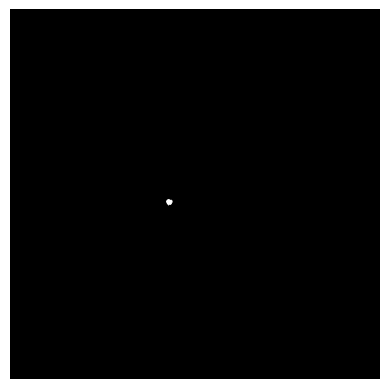

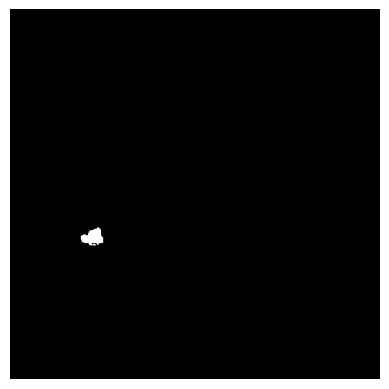

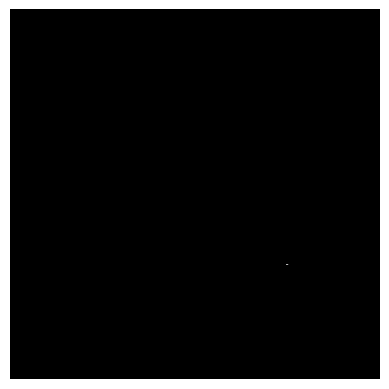

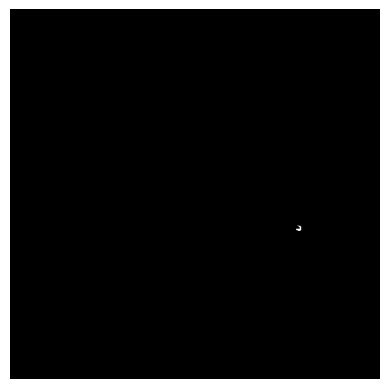

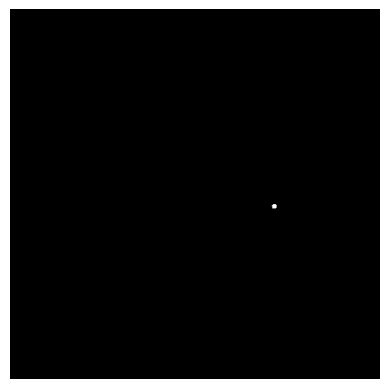

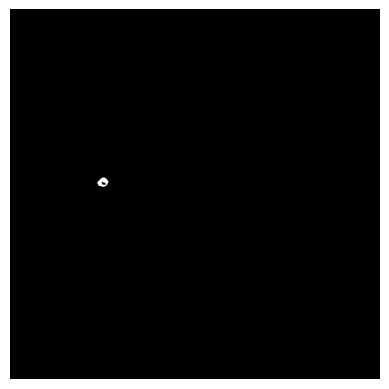

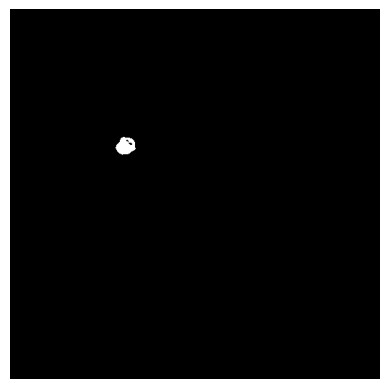

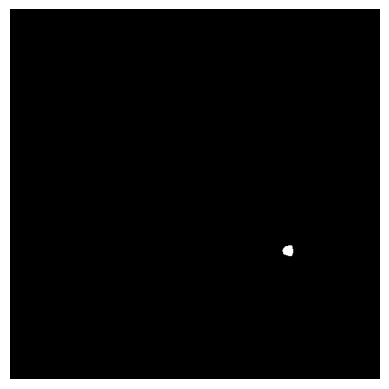

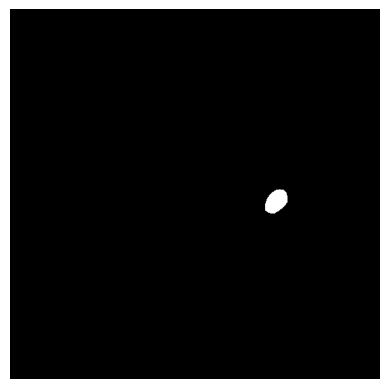

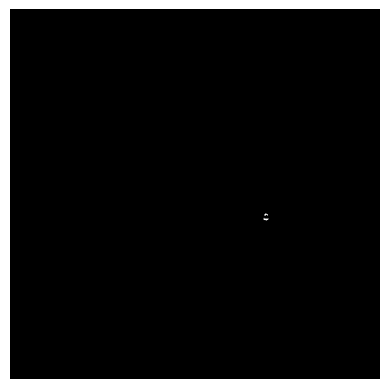

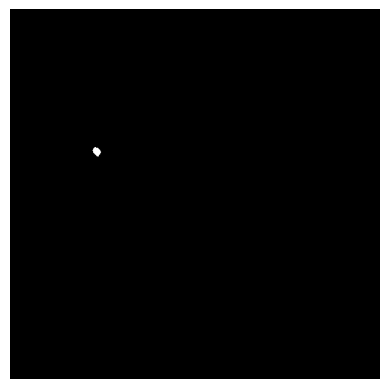

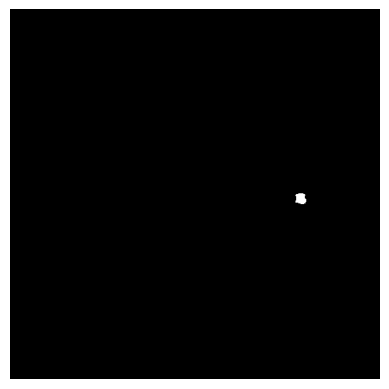

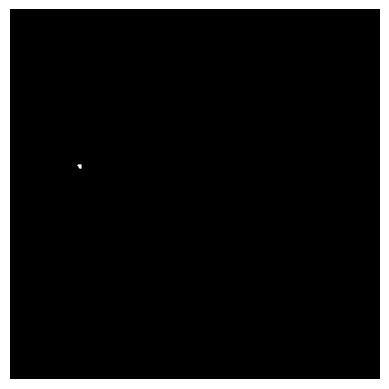

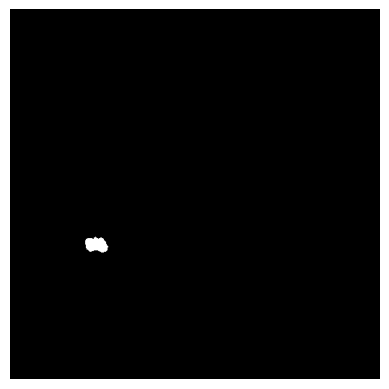

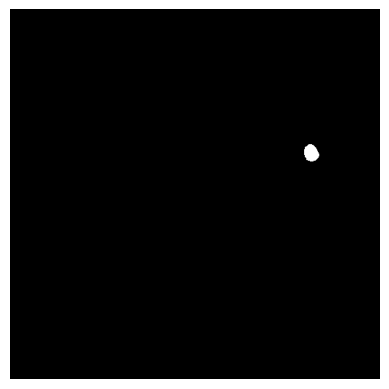

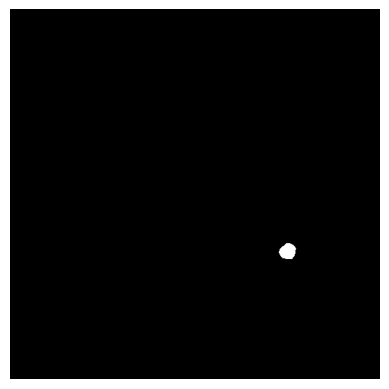

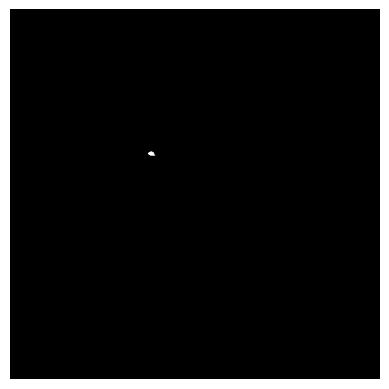

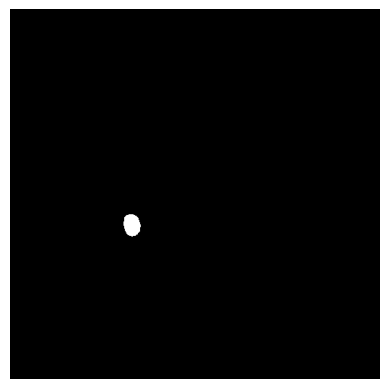

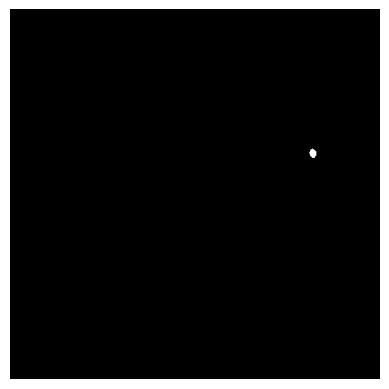

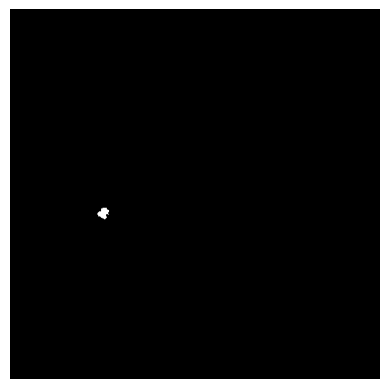

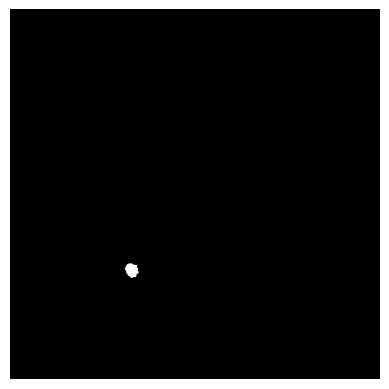

UnidentifiedImageError: cannot identify image file '/kaggle/working/nnUNet_raw/Dataset099_NoduleSegmantation/pred_masks/dataset.json'

In [47]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt


for i in range(len(pred_masks)):
    mask = Image.open('/kaggle/working/nnUNet_raw/Dataset099_NoduleSegmantation/pred_masks/'+pred_masks[i])
    mask = np.array(mask)
    if np.max(mask)!=0 :
        plt.imshow(mask, cmap='gray')  
        plt.axis('off') 
        plt.show()
        


In [48]:
for i in range(len(pred_masks)):
    mask = Image.open('/kaggle/working/nnUNet_raw/Dataset099_NoduleSegmantation/pred_masks/'+pred_masks[i])
    mask = np.array(mask)
    if np.max(mask)!=0 :
        print(np.unique(mask))

[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]


UnidentifiedImageError: cannot identify image file '/kaggle/working/nnUNet_raw/Dataset099_NoduleSegmantation/pred_masks/dataset.json'

In [55]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def annotations(mask) :
    ans=[]
    num_labels, labels = cv2.connectedComponents(mask.astype(np.uint8))
    #print(num_labels, labels)
    for i in range(1, num_labels) :
        ys, xs = np.where(labels == i)
        min_x, max_x = xs.min(), xs.max()
        min_y, max_y = ys.min(), ys.max()
        class_id=mask[ys[0], xs[0]]
        #print(class_id, xs[0],ys[0])
        x_center=(min_x+max_x)/2/512
        y_center=(min_y+max_y)/2/512
        width=(max_x-min_x+2)/512
        height=(max_y-min_y+2)/512
        ans.append([class_id, x_center, y_center, width, height])
    return ans

for i in range(len(pred_masks)):
    if pred_masks[i][-4:]!='json' :
        mask = Image.open('/kaggle/working/nnUNet_raw/Dataset099_NoduleSegmantation/pred_masks/'+pred_masks[i])
        mask = np.array(mask)
        new_path='/kaggle/working/nnUNet_raw/Dataset099_NoduleSegmantation/pred_bboxes/'+pred_masks[i][:-4]+'.txt'
        anns=annotations(mask)
        with open(new_path, "w", encoding="utf-8") as f:
            for ann in anns:
                    f.write(f'{1} {ann[1]} {ann[2]} {ann[3]} {ann[4]}\n')

In [58]:
import os
import numpy as np

def yolo_to_bbox(yolo_box, img_w=1, img_h=1):
    x_c, y_c, w, h = yolo_box
    x1 = (x_c - w / 2) * img_w
    y1 = (y_c - h / 2) * img_h
    x2 = (x_c + w / 2) * img_w
    y2 = (y_c + h / 2) * img_h
    return [x1, y1, x2, y2]

def iou(boxA, boxB):
    xA = max(boxA[0], boxB[0])
    yA = max(boxA[1], boxB[1])
    xB = min(boxA[2], boxB[2])
    yB = min(boxA[3], boxB[3])

    interW = max(0, xB - xA)
    interH = max(0, yB - yA)
    interArea = interW * interH

    boxAArea = (boxA[2] - boxA[0]) * (boxA[3] - boxA[1])
    boxBArea = (boxB[2] - boxB[0]) * (boxB[3] - boxB[1])

    iou = interArea / float(boxAArea + boxBArea - interArea + 1e-6)
    return iou

def load_yolo_file(filepath):
    boxes = []
    with open(filepath, 'r') as f:
        for line in f:
            parts = line.strip().split()
            if len(parts) != 5:
                continue
            cls_id, x_c, y_c, w, h = parts
            boxes.append([float(x_c), float(y_c), float(w), float(h)])
    return boxes

def calculate_metrics(gt_folder, pred_folder, iou_threshold=0.5):
    TP = 0
    FP = 0
    FN = 0

    gt_files = sorted(os.listdir(gt_folder))
    pred_files = sorted(os.listdir(pred_folder))

    for gt_file in gt_files:
        gt_path = os.path.join(gt_folder, gt_file)
        pred_path = os.path.join(pred_folder, gt_file)

        gt_boxes_norm = load_yolo_file(gt_path)
        pred_boxes_norm = load_yolo_file(pred_path) if os.path.exists(pred_path) else []

        gt_boxes = [yolo_to_bbox(box) for box in gt_boxes_norm]
        pred_boxes = [yolo_to_bbox(box) for box in pred_boxes_norm]

        matched_gt = set()
        matched_pred = set()

        for i_pred, pbox in enumerate(pred_boxes):
            best_iou = 0
            best_gt_idx = -1
            for i_gt, gtbox in enumerate(gt_boxes):
                if i_gt in matched_gt:
                    continue
                cur_iou = iou(pbox, gtbox)
                if cur_iou > best_iou:
                    best_iou = cur_iou
                    best_gt_idx = i_gt
            if best_iou >= iou_threshold:
                TP += 1
                matched_gt.add(best_gt_idx)
                matched_pred.add(i_pred)
            else:
                FP += 1
        FN += len(gt_boxes) - len(matched_gt)

    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    return precision, recall, TP, FP, FN


gt_folder = '/kaggle/working/nnUNet_raw/Dataset099_NoduleSegmantation/gt_bboxes'
pred_folder = '/kaggle/working/nnUNet_raw/Dataset099_NoduleSegmantation/pred_bboxes'

precision, recall, TP, FP, FN = calculate_metrics(gt_folder, pred_folder)
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f" {TP:.4f}")
print(f" {FP:.4f}")
print(f" {FN:.4f}")

Precision: 0.4330
Recall: 0.3392
 97.0000
 127.0000
 189.0000


In [59]:
gt_folder = '/kaggle/working/nnUNet_raw/Dataset099_NoduleSegmantation/gt_bboxes'
pred_folder = '/kaggle/working/nnUNet_raw/Dataset099_NoduleSegmantation/pred_bboxes'

precision, recall, TP, FP, FN = calculate_metrics(gt_folder, pred_folder, iou_threshold=0.1)
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f" {TP:.4f}")
print(f" {FP:.4f}")
print(f" {FN:.4f}")

Precision: 0.5804
Recall: 0.4545
 130.0000
 94.0000
 156.0000


In [ ]:
import shutil

shutil.make_archive('nnunet_results', 'zip', '/kaggle/working/nnUNet_raw/Dataset099_NoduleSegmantation')
